<a href="https://colab.research.google.com/github/dleondevx/Painting-flowers-with-neural-net/blob/main/Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
import cv2
import shutil
from PIL import Image
import os

drive.mount("/content/drive")

Mounted at /content/drive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

In [8]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# def transforming(address):
#     img = cv2.imread(address)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.GaussianBlur(img, (5,5), 0)
#     img = cv2.Canny(img, 50, 150)
#     img = 255 - img
#     return img

# def move_file(src, dst, new_name):
#     dst = os.path.join(dst, new_name)
#     shutil.move(src, dst)

# address = 'drive/MyDrive/training-out/'
# directory = 'drive/MyDrive/training-in/'

# for file in os.listdir('drive/MyDrive/training-out'):
#   if os.path.exists(address+ file):
#     img = transforming('drive/MyDrive/training-out/'+file)
#     img = Image.fromarray(img)
#     img.save(os.path.join(directory+file))


In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#root path
PATH = '/content/drive/My Drive/'

#data sets path
INPATH = PATH + 'training-in'
OUTPATH = PATH +'training-out'
# checkpoints path
CKPATH = PATH + 'checkpoints'

imgurls = !ls -1 "{INPATH}"


In [27]:
n = 600
train_n = round(n*0.8)

#randomized list
randurls = np.copy(imgurls)

np.random.seed(654)
np.random.shuffle(randurls)

#Partition
tr_urls = randurls[:train_n]
ts_urls = randurls[train_n:n]

print(len(imgurls),len(tr_urls),len(ts_urls))

8189 480 120


In [62]:

IMG_WIDTH = 256
IMG_HEIGHT = 256

#Rescaling images
def resize(inimg, tgimg, height, width):
    
    inimg = tf.image.resize(inimg, [height, width])
    tgimg = tf.image.resize(tgimg, [height, width])
    return inimg, tgimg


#Normalizing images to be in range [-1,1]
def normalize(inimg, tgimg): 
    inimg = (inimg /127.5) - 1
    tgimg = (tgimg /127.5) - 1
    return inimg, tgimg

#Augmentation of data : Random Crop + Flip
@tf.function()
def random_jitter(inimg, tgimg):

    inimg, tgimg = resize(inimg, tgimg, IMG_HEIGHT + 30 , IMG_WIDTH + 30)

    inimg = tf.concat([inimg,inimg,inimg],2)

    stacked_image = tf.stack([inimg, tgimg], axis = 0)
    cropped_image = tf.image.random_crop(stacked_image, size = [2, IMG_HEIGHT, IMG_WIDTH,3])
      
    inimg = cropped_image[0]
    tgimg = cropped_image[1]


    if tf.random.uniform(()) < 0.5:

        inimg = tf.image.flip_left_right(inimg)
        tgimg = tf.image.flip_left_right(tgimg)
    
    return inimg, tgimg

def load_image(file_name, augment = True):

    inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + '/' + file_name )),tf.float32)[...,:1]
    tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH + '/' + file_name )),tf.float32)[...,:3]

    inimg, tgimg = resize(inimg, tgimg, IMG_HEIGHT,IMG_WIDTH)

    if augment:
        inimg, tgimg = random_jitter(inimg, tgimg)
    else:
        inimg = tf.concat([inimg,inimg,inimg],2)
    
    inimg, tgimg = normalize(inimg, tgimg)

    return inimg, tgimg

def load_train_image(filename):
    return load_image(filename, True)

def load_test_image(filename):
    return load_image(filename, False)

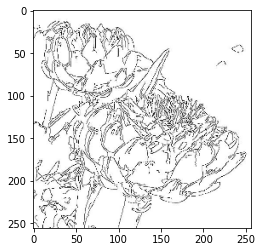

In [63]:
plt.imshow((load_test_image(randurls[104])[0]+1)/2)

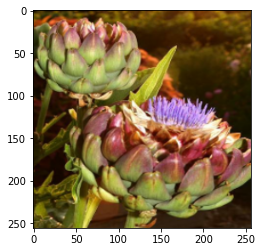

In [64]:
plt.imshow((load_train_image(randurls[104])[1]+1)/2)